
Summary Report:
 {'Torch Model Accuracy': 0.9761904761904762, 'ZKML Model Accuracy': 0.9666666666666667, 'Average Times': proof_generation_time       48.336812
proof_verification_time      0.731200
witness_generation_time      0.359780
torch_model_predict_time     0.009827
dtype: float64, 'Standard Deviation of Times': proof_generation_time       5.753113
proof_verification_time     0.235234
witness_generation_time     0.144766
torch_model_predict_time    0.007965
dtype: float64}

Average Total Execution Time (ZKML): 49.45570771353585
Average Total Prediction Time (ZKML): 0.35977966898963565
Average Torch Model Prediction Time: 0.009826711245945472
Difference in Prediction Time: 0.3499529577436902


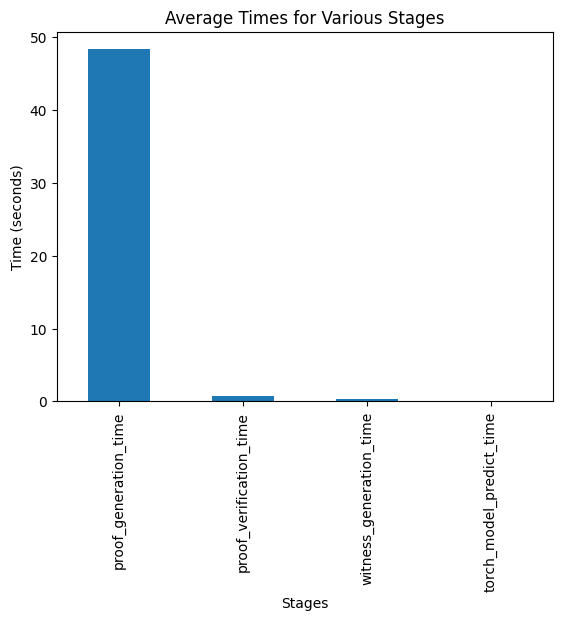

In [126]:
import pandas as pd
import numpy as np

cal_sample = 30

# Load the CSV data into a DataFrame
data = pd.read_csv(f"zkp_execution_results_cal_{cal_sample}.csv")



# Calculate the accuracy of torch_model_prediction and ZKML_preredicted_label
torch_accuracy = np.mean(data['actual_label'] == data['torch_model_prediction'])
zkml_accuracy = np.mean(data['actual_label'] == data['ZKML_preredicted_label'])

# # Calculate the number of correct proofs and verifications
# proof_correct = np.sum(data['proof'] == True)
# verification_correct = np.sum(data['verification'] == True)

# Calculate the average time for proof generation, proof verification, total execution, witness generation, and torch model prediction
average_times = data[['proof_generation_time', 'proof_verification_time', 'witness_generation_time', 'torch_model_predict_time']].mean()

# Calculate the standard deviation for the times
std_times = data[['proof_generation_time', 'proof_verification_time', 'witness_generation_time', 'torch_model_predict_time']].std()

# Generate a summary report
summary_report = {
    "Torch Model Accuracy": torch_accuracy,
    "ZKML Model Accuracy": zkml_accuracy,
    # "Correct Proofs": proof_correct,
    # "Correct Verifications": verification_correct,
    "Average Times": average_times,
    "Standard Deviation of Times": std_times,
}

# Display the basic statistics and summary report
# print("Basic Statistics:\n", stats)
print("\nSummary Report:\n", summary_report)

# Additional insights
# Compare performance differences between torch and ZKML model
execution_time_difference = data['witness_generation_time'].mean() - data['torch_model_predict_time'].mean()

print(f"\nAverage Total Execution Time (ZKML): {data['total_execution_time'].mean()}")
print(f"Average Total Prediction Time (ZKML): {data['witness_generation_time'].mean()}")
print(f"Average Torch Model Prediction Time: {data['torch_model_predict_time'].mean()}")
print(f"Difference in Prediction Time: {execution_time_difference}")

# Saving the summary report to a file
summary_df = pd.DataFrame.from_dict(summary_report, orient='index', columns=['Value'])
summary_df.to_csv("summary_report.csv", index=True)

# Plotting for visualization (Optional)
import matplotlib.pyplot as plt

# Plot the average times
average_times.plot(kind='bar', title='Average Times for Various Stages')
plt.xlabel('Stages')
plt.ylabel('Time (seconds)')
plt.show()


In [127]:
# Basic statistics
stats = data[["proof_generation_time",	"proof_verification_time",	"total_execution_time"	,"witness_generation_time",	"torch_model_predict_time"]].describe()

stats.to_csv(f"basic_data_stats_{cal_sample}.csv")
stats

,proof_generation_time,proof_verification_time,total_execution_time,witness_generation_time,torch_model_predict_time
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,48.336812,0.731200,49.455708,0.359780,0.009827
std,5.753113,0.235234,5.841275,0.144766,0.007965
min,43.410093,0.539821,44.410421,0.214510,0.002488
25%,44.887138,0.614547,46.006802,0.274877,0.005899
50%,45.860674,0.688631,47.026709,0.329311,0.008271
75%,49.921218,0.768005,51.064958,0.405364,0.010681
max,81.723491,2.502339,82.884544,1.751968,0.087241


In [128]:
summary_report

{'Torch Model Accuracy': 0.9761904761904762,
 'ZKML Model Accuracy': 0.9666666666666667,
 'Average Times': proof_generation_time       48.336812
 proof_verification_time      0.731200
 witness_generation_time      0.359780
 torch_model_predict_time     0.009827
 dtype: float64,
 'Standard Deviation of Times': proof_generation_time       5.753113
 proof_verification_time     0.235234
 witness_generation_time     0.144766
 torch_model_predict_time    0.007965
 dtype: float64}

In [129]:
summary_df

,Value
Torch Model Accuracy,0.97619
ZKML Model Accuracy,0.966667
Average Times,proof_generation_time 48.336812 proof_ve...
Standard Deviation of Times,proof_generation_time 5.753113 proof_ver...


In [130]:
# !pip install plotly

In [139]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff

# Load the CSV data into a DataFrame
# data = pd.read_csv("zkp_execution_results.csv")

# Function to create confusion matrix
def create_confusion_matrix(actual, predicted):
    unique_labels = np.unique(np.concatenate((actual, predicted)))
    cm = pd.crosstab(actual, predicted, rownames=['Actual'], colnames=['Predicted'], dropna=False)
    cm = cm.reindex(index=unique_labels, columns=unique_labels, fill_value=0)
    return cm

# Confusion matrix for Torch model
cm_torch = create_confusion_matrix(data['actual_label'], data['torch_model_prediction'])

# Confusion matrix for ZKML model
cm_zkml = create_confusion_matrix(data['actual_label'], data['ZKML_preredicted_label'])

# Function to plot confusion matrix using Plotly
def plot_confusion_matrix(cm, title):
    z = cm.values
    x = cm.columns.tolist()
    y = cm.index.tolist()
    
    fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis', annotation_text=z, showscale=True)
    fig.update_layout(title=title, xaxis_title="Predicted", yaxis_title="Actual")
    fig.show()

# Plot confusion matrix for Torch model
plot_confusion_matrix(cm_torch, "Confusion Matrix for Torch Model")

# Plot confusion matrix for ZKML model
plot_confusion_matrix(cm_zkml, f"Confusion Matrix for ZKML Model {cal_sample} datapoints")


In [132]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import plotly.graph_objects as go
import plotly.express as px

# # Load the CSV data into a DataFrame
# data = pd.read_csv("performance_data.csv")

# Accuracy, Precision, Recall, F1 Score for Torch model
accuracy_torch = accuracy_score(data['actual_label'], data['torch_model_prediction'])
precision_torch = precision_score(data['actual_label'], data['torch_model_prediction'], average='macro')
recall_torch = recall_score(data['actual_label'], data['torch_model_prediction'], average='macro')
f1_torch = f1_score(data['actual_label'], data['torch_model_prediction'], average='macro')

# Accuracy, Precision, Recall, F1 Score for ZKML model
accuracy_zkml = accuracy_score(data['actual_label'], data['ZKML_preredicted_label'])
precision_zkml = precision_score(data['actual_label'], data['ZKML_preredicted_label'], average='macro')
recall_zkml = recall_score(data['actual_label'], data['ZKML_preredicted_label'], average='macro')
f1_zkml = f1_score(data['actual_label'], data['ZKML_preredicted_label'], average='macro')

# Print the metrics
print("Torch Model - Accuracy:", accuracy_torch, "Precision:", precision_torch, "Recall:", recall_torch, "F1 Score:", f1_torch)
print("ZKML Model - Accuracy:", accuracy_zkml, "Precision:", precision_zkml, "Recall:", recall_zkml, "F1 Score:", f1_zkml)

# Execution Time Analysis
fig = go.Figure()
fig.add_trace(go.Bar(x=data.index, y=data['proof_generation_time'], name='Proof Generation Time'))
fig.add_trace(go.Bar(x=data.index, y=data['proof_verification_time'], name='Proof Verification Time'))
fig.add_trace(go.Bar(x=data.index, y=data['witness_generation_time'], name='Witness Generation Time'))
fig.add_trace(go.Bar(x=data.index, y=data['torch_model_predict_time'], name='Torch Model Prediction Time'))
fig.update_layout(barmode='group', title='Execution Time Analysis', xaxis_title='Index', yaxis_title='Time (seconds)')
fig.show()

# Distribution of Labels
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['actual_label'], name='Actual Labels'))
fig.add_trace(go.Histogram(x=data['torch_model_prediction'], name='Torch Predictions'))
fig.add_trace(go.Histogram(x=data['ZKML_preredicted_label'], name='ZKML Predictions'))
fig.update_layout(barmode='overlay', title='Distribution of Labels', xaxis_title='Label', yaxis_title='Count')
fig.update_traces(opacity=0.75)
fig.show()

# ROC Curve and AUC
def plot_roc_curve(y_true, y_pred, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (area = {roc_auc:.2f})'))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random guess', line=dict(dash='dash')))
    fig.update_layout(title=title, xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
    fig.show()

# # Plot ROC curves for both models
# plot_roc_curve(data['actual_label'], data['torch_model_prediction'], "ROC Curve for Torch Model")
# plot_roc_curve(data['actual_label'], data['ZKML_preredicted_label'], "ROC Curve for ZKML Model")


Torch Model - Accuracy: 0.9761904761904762 Precision: 0.9779171311780008 Recall: 0.9802447665056361 F1 Score: 0.9787879267858622
ZKML Model - Accuracy: 0.9666666666666667 Precision: 0.9702447665056362 Recall: 0.9721417069243156 F1 Score: 0.969525055184174


In [133]:
# !pip install seaborn

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve

# Function to plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    fig = px.imshow(cm, text_auto=True, color_continuous_scale='Viridis', title=title)
    fig.update_layout(xaxis_title='Predicted', yaxis_title='Actual')
    fig.show()

# Confusion matrices for both models
plot_confusion_matrix(data['actual_label'], data['torch_model_prediction'], "Confusion Matrix for Torch Model")
plot_confusion_matrix(data['actual_label'], data['ZKML_preredicted_label'], "Confusion Matrix for ZKML Model")

# Box Plot for Execution Times
execution_times = data[['proof_generation_time', 'proof_verification_time', 'witness_generation_time', 'torch_model_predict_time']]
fig = px.box(execution_times, title='Box Plot for Execution Times')
fig.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred, pos_label=1)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='Precision-Recall curve'))
    fig.update_layout(title=title, xaxis_title='Recall', yaxis_title='Precision')
    fig.show()

# Plot Precision-Recall curves for both models
plot_precision_recall_curve(data['actual_label'], data['torch_model_prediction'], "Precision-Recall Curve for Torch Model")
plot_precision_recall_curve(data['actual_label'], data['ZKML_preredicted_label'], "Precision-Recall Curve for ZKML Model")

# Class-wise Performance Metrics
class_labels = np.unique(data['actual_label'])
class_metrics = []
for label in class_labels:
    class_metrics.append({
        'Class': label,
        'Accuracy': accuracy_score(data['actual_label'] == label, data['torch_model_prediction'] == label),
        'Precision': precision_score(data['actual_label'] == label, data['torch_model_prediction'] == label),
        'Recall': recall_score(data['actual_label'] == label, data['torch_model_prediction'] == label),
        'F1 Score': f1_score(data['actual_label'] == label, data['torch_model_prediction'] == label)
    })

class_metrics_df = pd.DataFrame(class_metrics)
print(class_metrics_df)

# Correlation Matrix
correlation_matrix = execution_times.corr()
fig = px.imshow(correlation_matrix, text_auto=True, title='Correlation Matrix of Execution Times')
fig.show()

# Histograms of Prediction Times
fig = px.histogram(data, x='proof_generation_time', title='Histogram of Proof Generation Time')
fig.show()

fig = px.histogram(data, x='proof_verification_time', title='Histogram of Proof Verification Time')
fig.show()

fig = px.histogram(data, x='witness_generation_time', title='Histogram of Witness Generation Time')
fig.show()

fig = px.histogram(data, x='torch_model_predict_time', title='Histogram of Torch Model Prediction Time')
fig.show()

# Error Analysis
errors = data[data['actual_label'] != data['torch_model_prediction']]
print("Error Analysis for Torch Model:\n", errors)

errors_zkml = data[data['actual_label'] != data['ZKML_preredicted_label']]
print("Error Analysis for ZKML Model:\n", errors_zkml)


   Class  Accuracy  Precision    Recall  F1 Score
0      0  1.000000   1.000000  1.000000  1.000000
1      1  1.000000   1.000000  1.000000  1.000000
2      2  0.995238   0.956522  1.000000  0.977778
3      3  0.995238   0.944444  1.000000  0.971429
4      4  0.995238   0.958333  1.000000  0.978723
5      5  1.000000   1.000000  1.000000  1.000000
6      6  1.000000   1.000000  1.000000  1.000000
7      7  0.985714   0.958333  0.920000  0.938776
8      8  0.995238   1.000000  0.956522  0.977778
9      9  0.985714   0.961538  0.925926  0.943396


Error Analysis for Torch Model:
      actual_label  torch_model_prediction  ZKML_preredicted_label  proof  \
4               9                       7                       7   True   
11              7                       9                       7   True   
100             7                       3                       7   True   
101             9                       4                       4   True   
180             8                       2                       2   True   

     verification  proof_generation_time  proof_verification_time  \
4            True              51.593226                 0.633554   
11           True              45.396600                 0.610392   
100          True              48.687501                 0.591990   
101          True              47.385874                 0.887908   
180          True              58.938487                 0.679451   

     total_execution_time  witness_generation_time  torch_model_predict_time  
4               

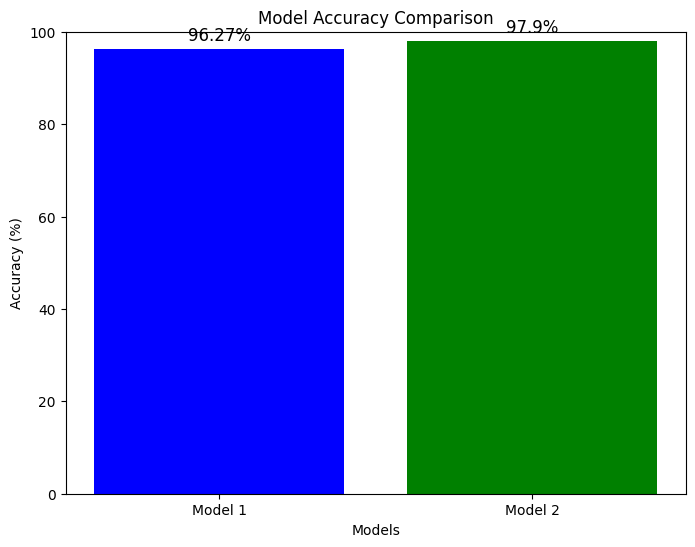

In [135]:
import matplotlib.pyplot as plt

# Model accuracies
model_names = ['Model 1', 'Model 2']
accuracies = [96.27, 97.9]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'])

# Adding titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Display accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc}%', ha='center', va='bottom', fontsize=12)

# Show plot
plt.show()


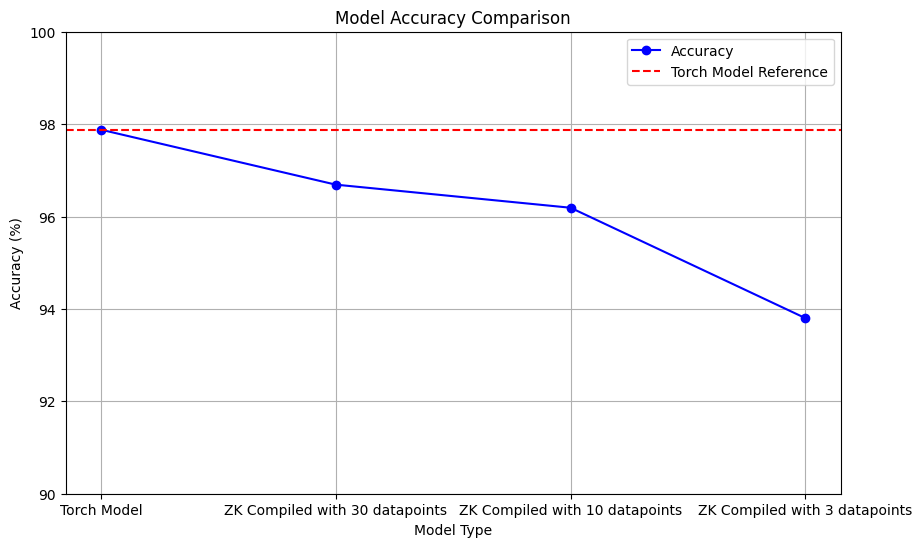

In [136]:
import matplotlib.pyplot as plt

# Data
models = ["Torch Model", "ZK Compiled with 30 datapoints", "ZK Compiled with 10 datapoints", "ZK Compiled with 3 datapoints"]
accuracy = [97.88, 96.69, 96.19, 93.80]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Reference line for Torch Model
plt.axhline(y=97.88, color='r', linestyle='--', label='Torch Model Reference')

# Adding titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model Type')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


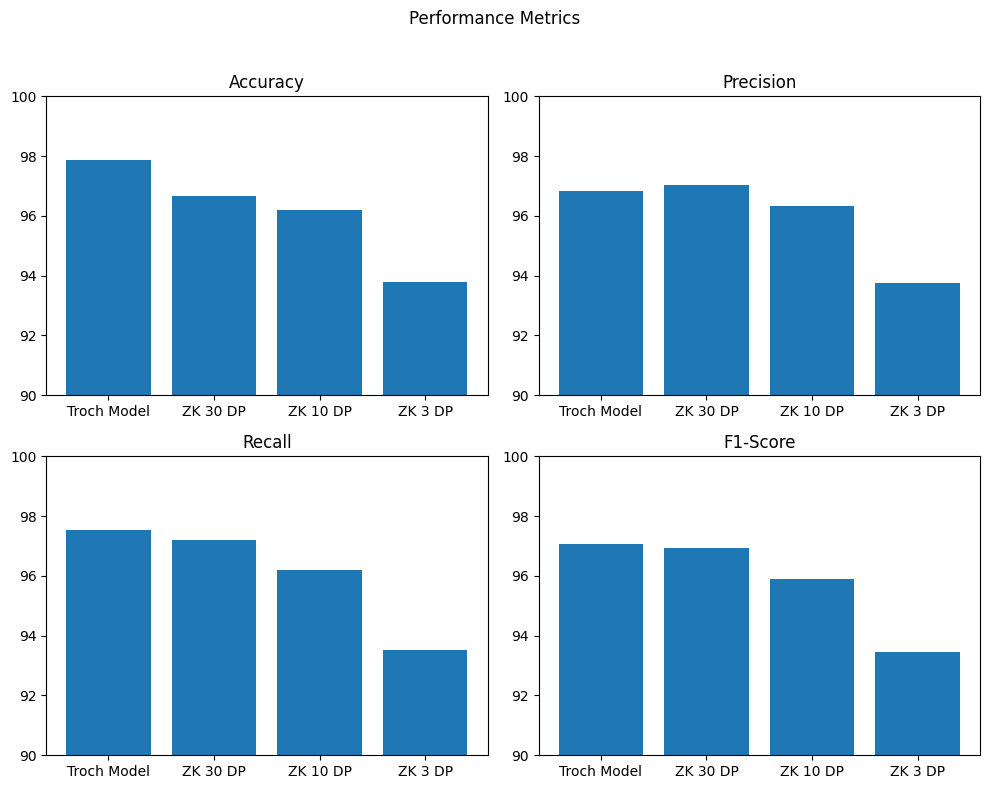

In [137]:
import matplotlib.pyplot as plt

# Data
models = [
    "Troch Model",
    "ZK 30 DP",
"ZK 10 DP",   
"ZK 3 DP",
]
accuracy = [97.88, 96.66, 96.19, 93.80]
precision = [96.85, 97.02, 96.33, 93.74]
recall = [97.52, 97.21, 96.21, 93.53]
f1_score = [97.06, 96.95, 95.89, 93.44]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Performance Metrics")

# Accuracy
axs[0, 0].bar(models, accuracy)
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_ylim(90, 100)

# Precision
axs[0, 1].bar(models, precision)
axs[0, 1].set_title("Precision")
axs[0, 1].set_ylim(90, 100)

# Recall
axs[1, 0].bar(models, recall)
axs[1, 0].set_title("Recall")
axs[1, 0].set_ylim(90, 100)

# F1-Score
axs[1, 1].bar(models, f1_score)
axs[1, 1].set_title("F1-Score")
axs[1, 1].set_ylim(90, 100)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


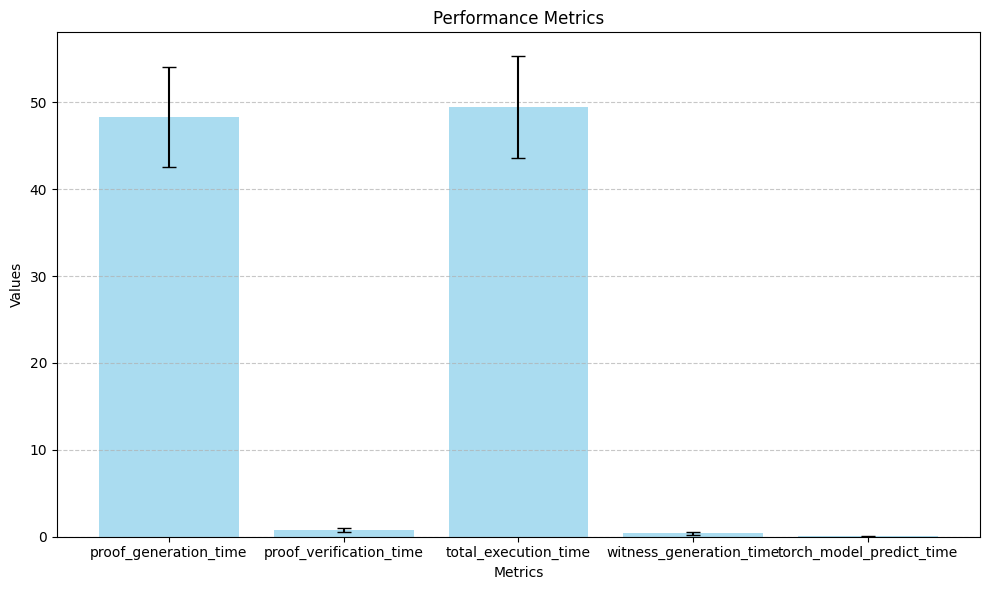

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

# Given data (replace with your actual data)
metrics = [
    "proof_generation_time",
    "proof_verification_time",
    "total_execution_time",
    "witness_generation_time",
    "torch_model_predict_time",
]
mean_values = [48.33681, 0.7312, 49.45571, 0.35978, 0.009827]
std_values = [5.753113, 0.235234, 5.841275, 0.144766, 0.007965]

# Create a DataFrame
df = pd.DataFrame({
    "Metric": metrics,
    "Mean": mean_values,
    "Std": std_values,
    "Min": [43.41009, 0.539821, 44.41042, 0.21451, 0.002488],
    "25%": [44.88714, 0.614547, 46.0068, 0.274877, 0.005899],
    "50%": [45.86067, 0.688631, 47.02671, 0.329311, 0.008271],
    "75%": [49.92122, 0.768005, 51.06496, 0.405364, 0.010681],
    "Max": [81.72349, 2.502339, 82.88454, 1.751968, 0.087241]
})

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df["Metric"], df["Mean"], yerr=df["Std"], capsize=5, color="skyblue", alpha=0.7)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Performance Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
